### Project is a simple farming based project
----
Using a lot of mock data and pseudo data

In [1]:
# General imports and packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import folium
import rasterio
from PIL import Image
import numpy as np

In [2]:
df = pd.read_csv("sample_data.csv", index_col="Field ID")
df

,Soil N (ppm),Soil P (ppm),Soil K (ppm),Soil pH,Avg Temp (°C),Annual Precipitation (mm),Crop Type,Growth Stage,Water Requirement (L/m²),Elevation (m),Slope (%),Proximity to Water (m)
Field ID,,,,,,,,,,,,
0,20,30,150,6.5,16,750,Wheat,Seeding,0.4,120,2,100
1,10,25,100,7.0,14,650,Lavender,Flowering,0.2,200,3,250
2,15,20,120,6.8,17,700,Wheat,Vegetative,0.6,100,5,150
3,5,15,80,7.2,19,500,Lavender,Harvest,0.1,90,10,300
4,25,35,160,6.3,15,800,Wheat,Harvest,0.7,110,4,80
5,30,40,170,7.4,18,550,Lavender,Germination,0.3,85,6,400


In [3]:
# Let's create more mock data based on the distribution of the given dataframe

# We will use the existing dataframe as a template for distributions and create more data points.

df_mock_data = df
# Set a seed for reproducibility
np.random.seed(0)

# Define the size of the new data
new_data_size = 40

# Generate random data based on the min and max of the existing data
mock_data_expanded = {
    "Soil N (ppm)": np.random.randint(df_mock_data["Soil N (ppm)"].min(), df_mock_data["Soil N (ppm)"].max(), new_data_size),
    "Soil P (ppm)": np.random.randint(df_mock_data["Soil P (ppm)"].min(), df_mock_data["Soil P (ppm)"].max(), new_data_size),
    "Soil K (ppm)": np.random.randint(df_mock_data["Soil K (ppm)"].min(), df_mock_data["Soil K (ppm)"].max(), new_data_size),
    "Soil pH": np.round(np.random.uniform(df_mock_data["Soil pH"].min(), df_mock_data["Soil pH"].max(), new_data_size), 1),
    "Avg Temp (°C)": np.random.randint(df_mock_data["Avg Temp (°C)"].min(), df_mock_data["Avg Temp (°C)"].max(), new_data_size),
    "Annual Precipitation (mm)": np.random.randint(df_mock_data["Annual Precipitation (mm)"].min(), df_mock_data["Annual Precipitation (mm)"].max(), new_data_size),
    "Crop Type": np.random.choice(df_mock_data["Crop Type"].unique(), new_data_size),
    "Growth Stage": np.random.choice(df_mock_data["Growth Stage"].unique(), new_data_size),
    "Water Requirement (L/m²)": np.round(np.random.uniform(df_mock_data["Water Requirement (L/m²)"].min(), df_mock_data["Water Requirement (L/m²)"].max(), new_data_size), 2),
    "Elevation (m)": np.random.randint(df_mock_data["Elevation (m)"].min(), df_mock_data["Elevation (m)"].max(), new_data_size),
    "Slope (%)": np.random.randint(df_mock_data["Slope (%)"].min(), df_mock_data["Slope (%)"].max(), new_data_size),
    "Proximity to Water (m)": np.random.randint(df_mock_data["Proximity to Water (m)"].min(), df_mock_data["Proximity to Water (m)"].max(), new_data_size)
}

# Convert the dictionary to a pandas dataframe
df_mock_data_expanded = pd.DataFrame(mock_data_expanded)

# Concatenate the new mock data with the existing data
df_full_mock_data = pd.concat([df_mock_data, df_mock_data_expanded], ignore_index=True)



{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4110, 'height': 3474, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009997566018978103, 0.0, 112.904998779,
       0.0, -0.009997121616580312, -9.005000113999998)}


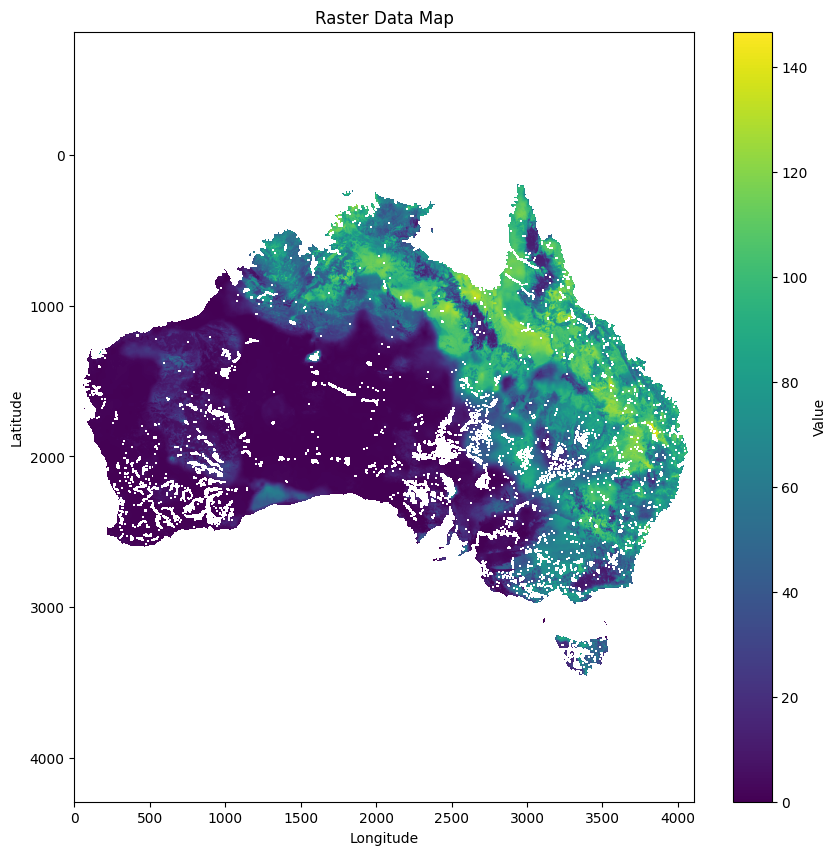

In [4]:

# Path to the TIFF file
tiff_file_path = 'smips_totalbucket_mm_mm_20240207.tif'

# Open the TIFF file using rasterio
with rasterio.open(tiff_file_path) as dataset:
    # Read the raster data itself
    raster_data = dataset.read()
    
    # If you want to read data from the first band only
    # raster_data = dataset.read(1)
    
    # Access the metadata of the raster
    metadata = dataset.meta
    
    # For example, print the metadata
    print(metadata)
    
    # If you need to transform the raster to a different coordinate system
    # transform = dataset.transform

    # You might also want to access other attributes, such as:
    # width = dataset.width
    # height = dataset.height
    # crs = dataset.crs

# Now `raster_data` contains the raster layers as numpy arrays, and `metadata` contains the metadata.
    # Open the TIFF file using rasterio
with rasterio.open(tiff_file_path) as dataset:
    # Read the raster data for the first band
    band1 = dataset.read(1)
    
    # Mask out the no data values
    band1 = np.ma.masked_where(band1 == dataset.nodata, band1)
    
    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(band1, cmap='viridis')  # You can choose a colormap that fits your data
    
    # If the data is large, you can use `extent` to limit the plotted area to a bounding box
    # plt.imshow(band1, cmap='viridis', extent=[left, right, bottom, top])
    
    plt.colorbar(label='Value')  # Add a colorbar to show the legend of the map
    plt.title('Raster Data Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Optionally, configure axes with the real-world coordinates
    # You can extract the bounds from the dataset's transform attribute and set the axis extent
    plt.axis('equal')  # Set the aspect ratio of the plot to equal
    plt.show()


In [5]:

# Load the raster data
tiff_file_path = 'smips_totalbucket_mm_mm_20240207.tif'

# Open the raster file
with rasterio.open(tiff_file_path) as data:
    # Get the bounds of the image
    bounds = data.bounds
    # Calculate the center of the image
    center = [(bounds.top + bounds.bottom) / 2, (bounds.right + bounds.left) / 2]

# Create a folium map centered around the center of the image
m = folium.Map(location=center, zoom_start=12)

# Display the map
# m


In [6]:
# Open the raster file
with rasterio.open(tiff_file_path) as src:
    # Read the data
    data = src.read(1)

    # Mask the 'no data' values, if necessary
    data = np.ma.masked_values(data, src.nodata)

    # Normalize the data to 0-255 range, assuming data contains positive values only
    data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255
    data = data.astype(np.uint8)

    # Convert the masked array to an image
    img = Image.fromarray(data)

    # Save the image as PNG
    img.save('overlay.png')

# After saving the image, you would then create an image overlay in Folium
from folium.raster_layers import ImageOverlay

# Create an image overlay with the raster data
overlay = ImageOverlay(
    name='Overlay',
    image='overlay.png',
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.6,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

# Add the overlay to the map
m.add_child(overlay)

# Add layer control to toggle on/off
folium.LayerControl().add_to(m)

# Display the map
# m


c:\Python312\Lib\site-packages\numpy\ma\core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
c:\Python312\Lib\site-packages\numpy\ma\core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)
C:\Users\harri\AppData\Local\Temp\ipykernel_12604\316071395.py:11: RuntimeWarning: invalid value encountered in cast
  data = data.astype(np.uint8)


In [7]:
# Coordinates of the point (longitude, latitude)
point_coords = (-37.9807789377824, 145.8089738788544)
point_coords = (3200, 2200)

# Open the TIFF file
with rasterio.open(tiff_file_path) as src:
    # Convert the point coordinates to the raster's coordinate system
    row, col = src.index(*point_coords)
    
    # Read the value at the given point
    value = src.read(1)[row, col]

print(f"The value at the point {point_coords} is: {value}")

IndexError: index -220965 is out of bounds for axis 0 with size 3474

In [ ]:
# Open the raster file
with rasterio.open(tiff_file_path) as data:
    # Get the bounds of the image
    bounds = data.bounds
    # Calculate the center of the image
    center = [(bounds.top + bounds.bottom) / 2, (bounds.right + bounds.left) / 2]

# Create a folium map centered around the center of the image
m = folium.Map(location=center, zoom_start=12)

# Fit the map to the bounds of the TIFF image
m.fit_bounds([(bounds.bottom, bounds.left), (bounds.top, bounds.right)])

# m


NameError: name 'rasterio' is not defined

In [35]:
# Generating the pseudo data

# Set a seed for reproducibility
np.random.seed(0)

# Create a sample of mock soil data
sample_soil_data = {
    "N_concentration": np.random.uniform(0.05, 0.15, 10),  # Nitrogen concentration (percent)
    "P_concentration": np.random.uniform(0.01, 0.05, 10),  # Phosphorus concentration (percent)
    "K_concentration": np.random.uniform(0.01, 0.08, 10),  # Potassium concentration (percent)
    "pH_level": np.random.uniform(5.5, 7.5, 10),  # pH level of the soil
    "Organic_matter": np.random.uniform(1.5, 5.0, 10),  # Organic matter (percent)
}

# Convert the dictionary to a pandas dataframe
df_sample_soil_data = pd.DataFrame(sample_soil_data)

def generate_rainfall_data(num_samples):
    """
    Generate mock rainfall data based on typical climate statistics for Victoria, Australia.
    
    Parameters:
    - num_samples: The number of samples (e.g., days or months) to generate.
    
    Returns:
    - A DataFrame with the mock rainfall data.
    """
    # Monthly average rainfall in Victoria can range from about 40mm in the drier months to 80mm in the wetter months.
    # Generate random rainfall data within this range
    rainfall_data = np.random.uniform(40, 80, num_samples)
    
    return pd.DataFrame({'Rainfall_mm': rainfall_data})

def generate_terrain_data(num_samples):
    """
    Generate mock terrain data including elevation, slope, and aspect.
    
    Parameters:
    - num_samples: The number of terrain samples to generate.
    
    Returns:
    - A DataFrame with the mock terrain data.
    """
    # Elevation in Victoria can vary widely, from sea level to the alpine regions. We'll use 0-1800 meters here as a range.
    elevation_data = np.random.uniform(0, 1800, num_samples)
    
    # Slope can range from 0% (flat) to over 100% (very steep). We'll use 0-30% as a typical agricultural range.
    slope_data = np.random.uniform(0, 30, num_samples)
    
    # Aspect is the compass direction that a slope faces, ranging from 0 to 360 degrees.
    aspect_data = np.random.uniform(0, 360, num_samples)
    
    return pd.DataFrame({
        'Elevation_m': elevation_data,
        'Slope_percent': slope_data,
        'Aspect_degrees': aspect_data
    })

# Generate the data
num_samples = 365  # For example, one year of daily rainfall data
mock_rainfall_data = generate_rainfall_data(num_samples)
mock_terrain_data = generate_terrain_data(num_samples)

# Display the first few rows of the data
mock_rainfall_data.head(), mock_terrain_data.head()


def generate_mock_data(base_data, num_samples):
    """
    Generate more mock data based on the sample data provided.
    
    Parameters:
    - base_data: A DataFrame with the base sample data.
    - num_samples: The number of new samples to generate.
    
    Returns:
    - A DataFrame with the new mock data.
    """
    new_data = {}
    for column in base_data.columns:
        min_val = base_data[column].min()
        max_val = base_data[column].max()
        new_data[column] = np.random.uniform(min_val, max_val, num_samples)
    
    return pd.DataFrame(new_data)

df_soil_data = generate_mock_data(df_sample_soil_data, 40)
df_rainfall = generate_mock_data(mock_rainfall_data, 40)
df_terrain = generate_mock_data(mock_terrain_data, 40)

In [39]:
def generate_farm_size_data(num_samples):
    """
    Generate mock data for farm sizes.
    
    Parameters:
    - num_samples: The number of farm size samples to generate.
    
    Returns:
    - A DataFrame with the mock farm size data.
    """
    # Assuming farm sizes in Victoria, Australia can range from small hobby farms to large commercial operations
    # For simplicity, we might consider farm sizes to range from 5 hectares to 2000 hectares
    farm_size_data = np.random.uniform(5, 2000, num_samples)
    
    return pd.DataFrame({'Farm_Size_hectares': farm_size_data})

# Generate the data
num_farms = 100  # For example, 100 different farms
mock_farm_size_data = generate_farm_size_data(num_farms)

# Display the first few rows of the data
mock_farm_size_data

,Farm_Size_hectares
0,165.532032
1,1086.662973
2,715.234483
3,1974.932804
4,32.242536
...,...
95,1548.042070
96,815.513631
97,1926.372311
98,570.609996


In [49]:
min_length = min(len(mock_farm_size_data), len(df_soil_data), len(df_rainfall), len(df_terrain))

# Truncate the DataFrames to the smallest length
mock_farm_size_data = mock_farm_size_data.head(min_length)
df_soil_data = df_soil_data.head(min_length)
df_rainfall = df_rainfall.head(min_length)
df_terrain = df_terrain.head(min_length)

# Concatenate the DataFrames horizontally
df_farm_data = pd.concat([mock_farm_size_data.reset_index(drop=True), 
                          df_soil_data.reset_index(drop=True), 
                          df_rainfall.reset_index(drop=True), 
                          df_terrain.reset_index(drop=True)], axis=1)

df_farm_data.head()

,Farm_Size_hectares,N_concentration,P_concentration,K_concentration,pH_level,Organic_matter,Rainfall_mm,Elevation_m,Slope_percent,Aspect_degrees
0,165.532032,0.090985,0.039958,0.062866,6.106488,3.609745,51.886234,1109.284301,25.198297,113.857002
1,1086.662973,0.099832,0.046964,0.067724,7.157537,3.431001,54.261192,692.725488,19.849073,184.919400
2,715.234483,0.111830,0.041494,0.040746,5.616688,2.338690,40.335342,1265.957025,1.785771,109.567984
3,1974.932804,0.123232,0.025818,0.030134,5.538259,2.552446,73.793228,636.686932,24.327891,309.874384
4,32.242536,0.133133,0.015426,0.024227,6.043962,3.776680,46.345224,279.870577,18.835163,303.617604


In [47]:
df_full_mock_data.head()

,Soil N (ppm),Soil P (ppm),Soil K (ppm),Soil pH,Avg Temp (°C),Annual Precipitation (mm),Crop Type,Growth Stage,Water Requirement (L/m²),Elevation (m),Slope (%),Proximity to Water (m)
0,20,30,150,6.5,16,750,Wheat,Seeding,0.4,120,2,100
1,10,25,100,7.0,14,650,Lavender,Flowering,0.2,200,3,250
2,15,20,120,6.8,17,700,Wheat,Vegetative,0.6,100,5,150
3,5,15,80,7.2,19,500,Lavender,Harvest,0.1,90,10,300
4,25,35,160,6.3,15,800,Wheat,Harvest,0.7,110,4,80
